In [2]:
!pip install kaggle

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#API to fetch the dataset from kaggle

!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:01<00:00, 182MB/s]
100% 163M/163M [00:01<00:00, 148MB/s]


In [3]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [4]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the dependencies**

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['with_mask_2497.jpg', 'with_mask_783.jpg', 'with_mask_1045.jpg', 'with_mask_2933.jpg', 'with_mask_2275.jpg']
['without_mask_2713.jpg', 'without_mask_1019.jpg', 'without_mask_2406.jpg', 'without_mask_3036.jpg', 'without_mask_3680.jpg']


In [7]:
print('number of mask', len(with_mask_files))
print('number of without_mask', len(without_mask_files))

number of mask 3725
number of without_mask 3828


**Creating labels for the two class of images**

**with mask** --> 1
**without mask **--> 0

create labels
### Label encoding

In [8]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [9]:
print(len(with_mask_labels))
print(len(without_mask_labels))


3725
3828


In [10]:
labels = with_mask_labels + without_mask_labels

In [11]:
print(len(labels))

7553


In [12]:
print(labels[0:5])

[1, 1, 1, 1, 1]


**Displaying the images**

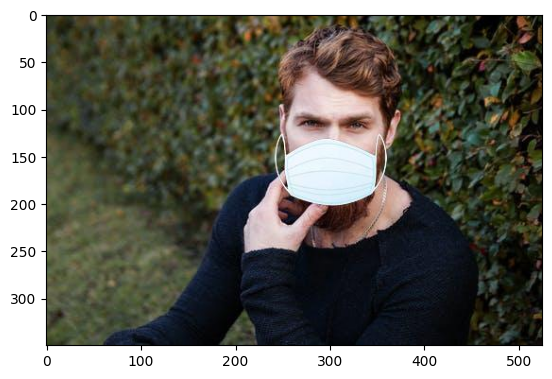

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

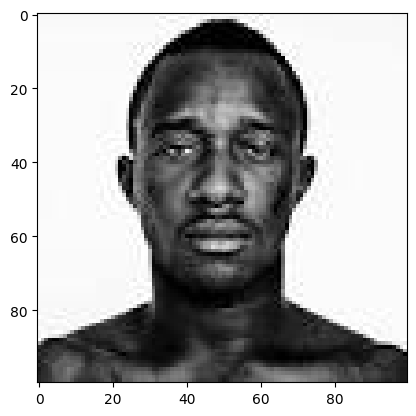

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [15]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

In [18]:
type(data[0])

numpy.ndarray

In [19]:
data[0].shape

(128, 128, 3)

In [20]:
X = np.array(data)
Y = np.array(labels)

In [21]:
type(X)

numpy.ndarray

In [22]:
  print(X.shape)
  print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test split**

In [23]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)


In [24]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [25]:
# Scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [26]:
X_train_scaled[0]

array([[[0.11372549, 0.09019608, 0.12941176],
        [0.11372549, 0.09019608, 0.12941176],
        [0.10588235, 0.08235294, 0.12156863],
        ...,
        [0.37647059, 0.30980392, 0.34117647],
        [0.39607843, 0.32941176, 0.36078431],
        [0.40392157, 0.3372549 , 0.36862745]],

       [[0.10980392, 0.08627451, 0.1254902 ],
        [0.10980392, 0.08627451, 0.1254902 ],
        [0.10196078, 0.07843137, 0.11764706],
        ...,
        [0.33333333, 0.26666667, 0.29803922],
        [0.36470588, 0.29803922, 0.32941176],
        [0.37647059, 0.30980392, 0.34117647]],

       [[0.09803922, 0.0745098 , 0.11372549],
        [0.09803922, 0.0745098 , 0.11372549],
        [0.09803922, 0.0745098 , 0.11372549],
        ...,
        [0.26666667, 0.2       , 0.23137255],
        [0.30980392, 0.24313725, 0.2745098 ],
        [0.32941176, 0.2627451 , 0.29411765]],

       ...,

       [[0.05882353, 0.0627451 , 0.07843137],
        [0.05490196, 0.05882353, 0.0745098 ],
        [0.05098039, 0

**Building neural network**

In [27]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential() #stack layers

#add layers
model.add(keras.layers.Conv2D(32,kernel_size = (3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64,kernel_size = (3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

# Flatten converts arrays to vectors
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

          # Dense layer connects neurons of current layers to previous layers
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

          # sigmoid = for binary classes, softmax = for multiple classes
model.add(keras.layers.Dense(num_of_classes,activation = 'sigmoid'))


In [36]:
#Compiling the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [37]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1,epochs = 5)
#less epoch as we have small dataset to avoid overfitting

Epoch 1/5
170/170 [==============================] - 11s 24ms/step - loss: 0.5161 - acc: 0.7760 - val_loss: 0.3008 - val_acc: 0.8876
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2949 - acc: 0.8860 - val_loss: 0.2438 - val_acc: 0.8975
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2474 - acc: 0.9036 - val_loss: 0.2343 - val_acc: 0.9140
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2030 - acc: 0.9170 - val_loss: 0.2061 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1741 - acc: 0.9365 - val_loss: 0.2001 - val_acc: 0.9306


**Model Accuracy**

In [38]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test accuracy', accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.1996 - acc: 0.9332
Test accuracy 0.9331568479537964


Kindly give the path of the image/content/mask3.jpg


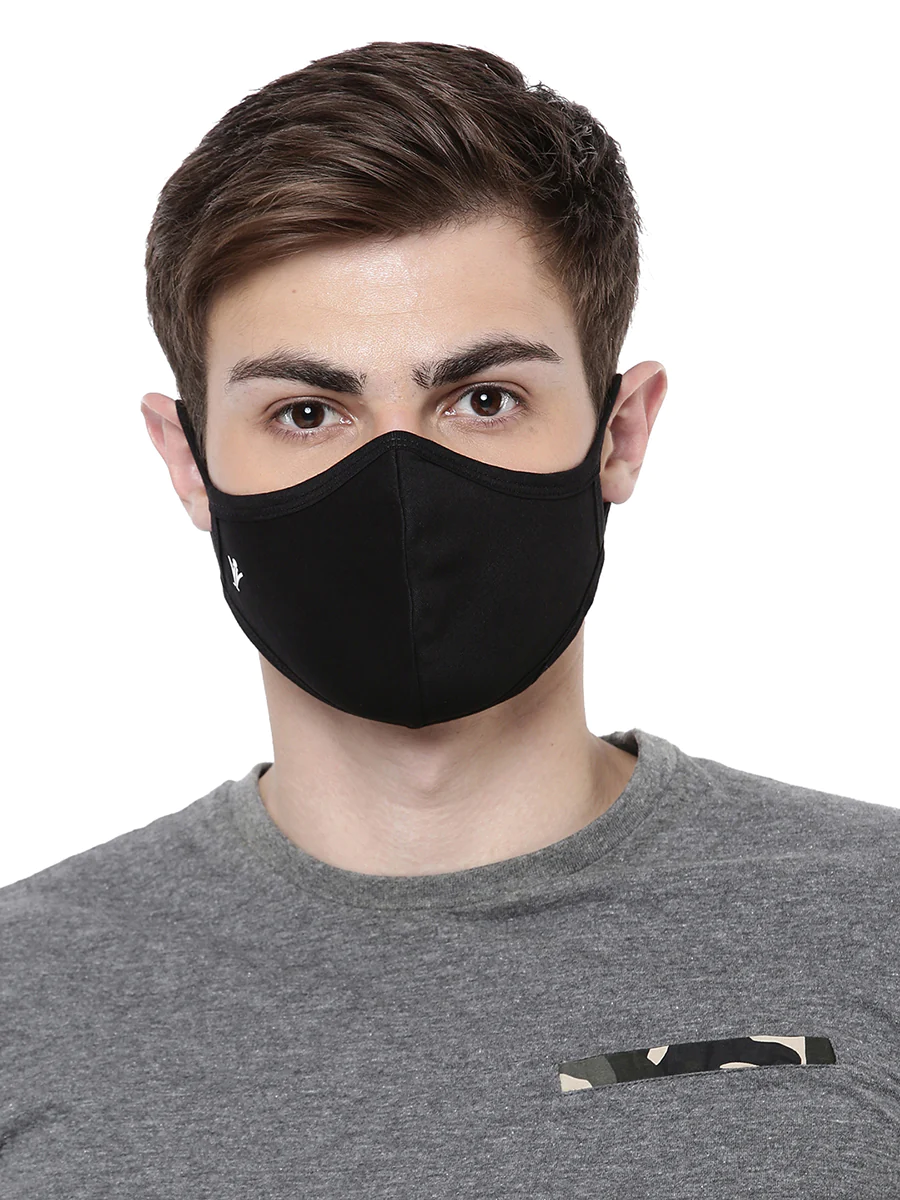

1/1 [==============================] - 0s 24ms/step
[[0.34469256 0.55901   ]]
1
Person is wearing a mask


In [42]:
input_image_path = input('Kindly give the path of the image')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_model = np.argmax(input_prediction)

print(input_pred_model)

if input_pred_model == 1:
  print('Person is wearing a mask')
else:
  print('Person is not wearing a mask')